                                        Оценка уровня ожирения на основе датасета 
Набор данных для оценки уровней ожирения на основе пищевых привычек и физического состояния у лиц из Колумбии, Перу и Мексики.

#### Атрибуты, связанные с привычками питания:
* Частое потребление высококалорийной пищи (FAVC), 
* частота потребления овощей (FCVC), 
* количество основных приемов пищи (NCP), 
* количество перекусов между основными приемами пищи (CAEC), 
* ежедневное потребление воды (CH20)
* потребления алкоголя (CALC). 
#### Атрибуты, связанные с физическим состоянием: 
* мониторинг потребления калорий (SCC),
* частота физической активности (FAF), 
* время использования технологических устройств (TUE), 
* использованный транспорт (MTRANS) - общественный транспорт 0, автомобиль 1, мотоцикл 2, пешком 3, велосипед 4 
#### Другими полученными переменными были: 
* пол **(Gender)** - мужчина 0, женщина 1
* возраст **(Age)**
* рост **(Height)** 
* вес **(Width)** 
* наследственный признак избыточного веса **(FHWO)** 

Наконец, все данные были помечены, и переменная класса NObesity была создана со значениями: 
* Недостаточный вес(0), 
* Нормальный вес(1), 
* Уровень избыточного веса I(2), 
* Уровень избыточного веса II(3), 
* Тип ожирения I(4), 
* Тип ожирения II(5),  
* Тип ожирения III(6), 

используя уравнение (1)

In [1]:
%%latex
\begin{equation}BMI = \frac{weight}{height^{2}} \end{equation}
Уравнение (1) 

<IPython.core.display.Latex object>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [11]:
# загружаем датасет
df = pd.read_csv('ObesityDataSet.csv')
pd.core.frame.DataFrame

pandas.core.frame.DataFrame

In [12]:
#путь к папке с изображениями
img_dir = os.path.join(os.getcwd(), 'img_dir')

In [13]:
pd.set_option("display.max.columns", None)
df.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,1
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,1
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,1
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,3,2
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2111 non-null   int64  
 1   Age     2111 non-null   float64
 2   Height  2111 non-null   float64
 3   Weight  2111 non-null   float64
 4   FHWO    2111 non-null   int64  
 5   FAVC    2111 non-null   int64  
 6   FCVC    2111 non-null   float64
 7   NCP     2111 non-null   float64
 8   CAEC    2111 non-null   int64  
 9   SMOKE   2111 non-null   int64  
 10  CH2O    2111 non-null   float64
 11  SCC     2111 non-null   int64  
 12  FAF     2111 non-null   float64
 13  TUE     2111 non-null   float64
 14  CALC    2111 non-null   int64  
 15  MTRANS  2111 non-null   int64  
 16  BMI     2111 non-null   int64  
dtypes: float64(8), int64(9)
memory usage: 280.5 KB


Данные без пропусков. Число атрибутов 17, строк 2111

In [15]:
df["BMI"].value_counts()

4    351
6    324
5    297
3    290
2    290
1    287
0    272
Name: BMI, dtype: int64

Людей с нормальным весом всего 287, у остальных недостаточный или избыточный вес.

In [16]:
df["FAVC"].value_counts(normalize=True)

1    0.883941
0    0.116059
Name: FAVC, dtype: float64

Примерно 88% употребляют высококалорийную пищу 

In [17]:
df.groupby('BMI').mean()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
BMI,,,,,,,,,,,,,,,,
0,0.636029,19.783237,1.691117,49.906330,0.463235,0.812500,2.480788,2.914403,1.448529,0.003676,1.871281,0.080882,1.250131,0.839459,0.573529,0.235294
1,0.491289,21.738676,1.676585,62.155052,0.540070,0.724739,2.334495,2.738676,1.498258,0.045296,1.850174,0.104530,1.247387,0.675958,0.696864,0.588850
2,0.500000,23.417674,1.687836,74.266828,0.720690,0.924138,2.264631,2.504218,0.962069,0.010345,2.058725,0.127586,1.056796,0.612992,0.882759,0.355172
3,0.355172,26.996981,1.703748,82.085271,0.937931,0.744828,2.260578,2.495529,1.072414,0.017241,2.025133,0.013793,0.958072,0.697275,0.624138,0.393103
4,0.444444,25.884941,1.693804,92.870198,0.980057,0.968661,2.186050,2.431862,1.048433,0.017094,2.112218,0.005698,0.986748,0.676743,0.569801,0.347578
5,0.006734,28.233785,1.771795,115.305311,0.996633,0.976431,2.391284,2.744555,1.013468,0.050505,1.877658,0.003367,0.971857,0.515186,0.767677,0.343434
6,0.996914,23.495554,1.687559,120.941114,1.000000,0.996914,3.000000,3.000000,1.003086,0.003086,2.208493,0.000000,0.664817,0.604623,0.996914,0.003086


Вывод основных статистических данных для каждого состояния веса.

# Визуализация данных

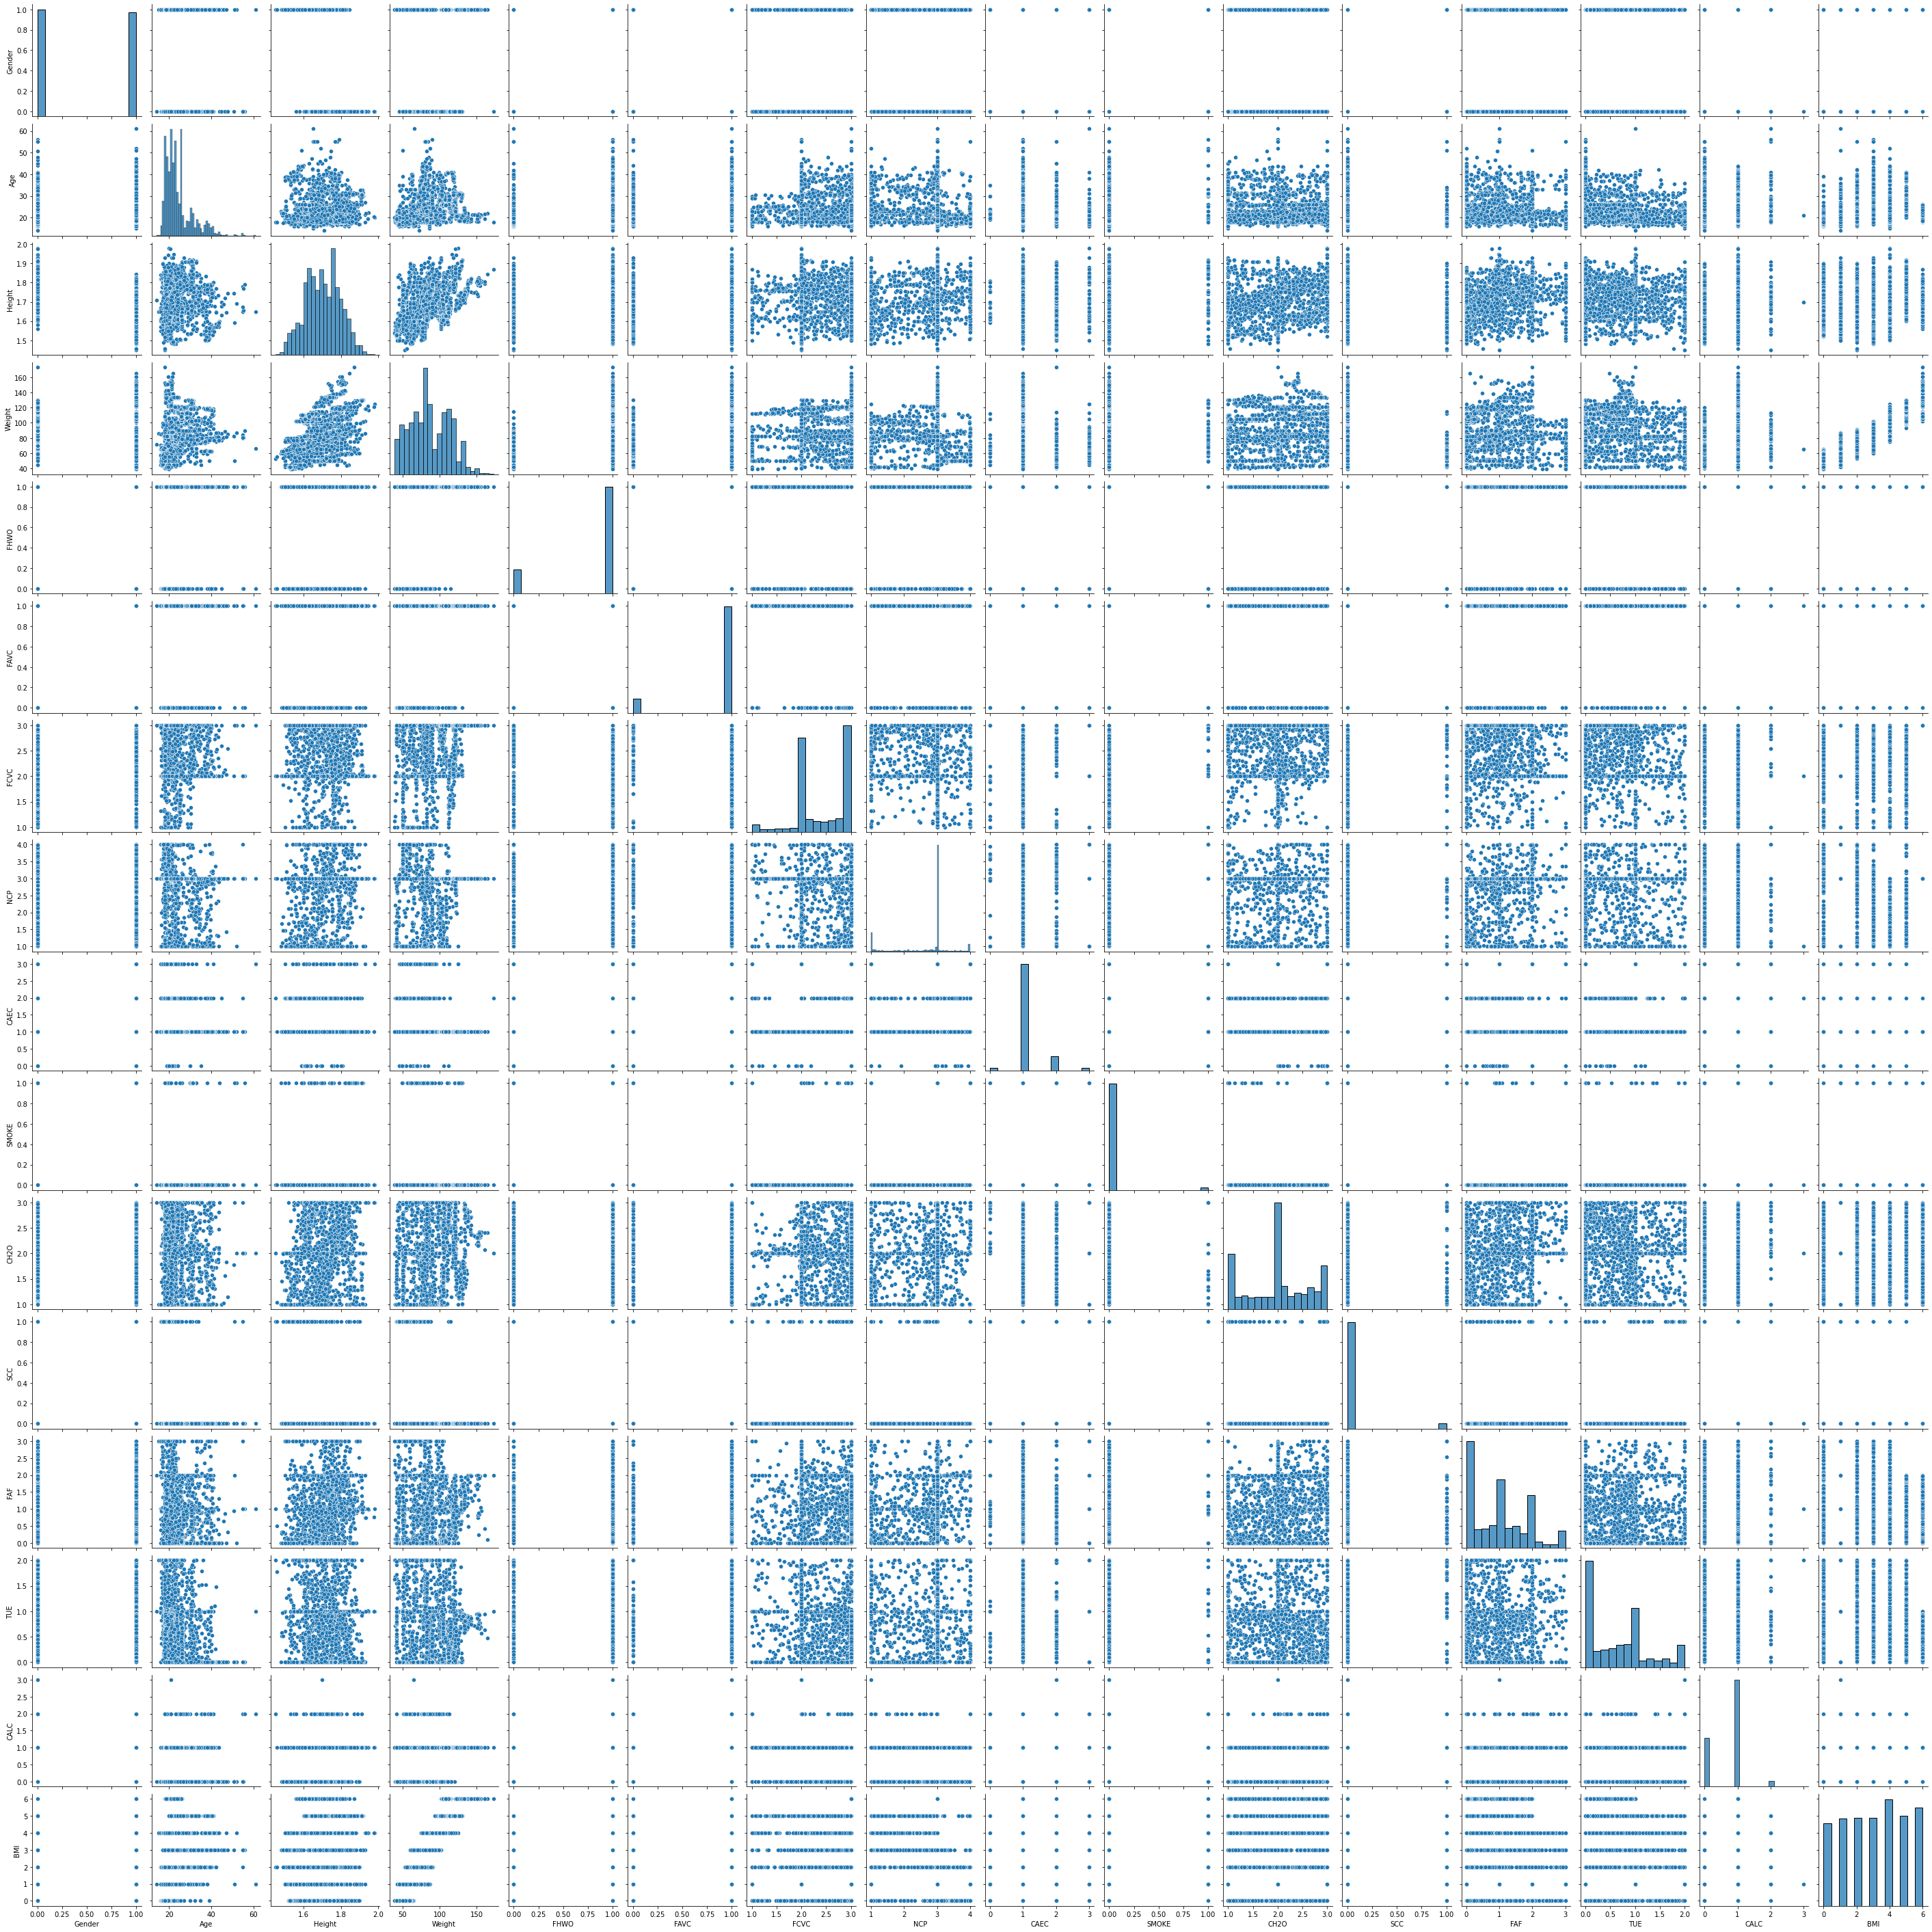

In [18]:
# вывод графика отношений признаков друг с другом 
sns.pairplot(df[['Gender','Age','Height','Weight','FHWO','FAVC','FCVC','NCP',
                 'CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','BMI']])
plt.savefig(os.path.join(img_dir, 'Obesity DataSet. Features Pair Plot.png'))

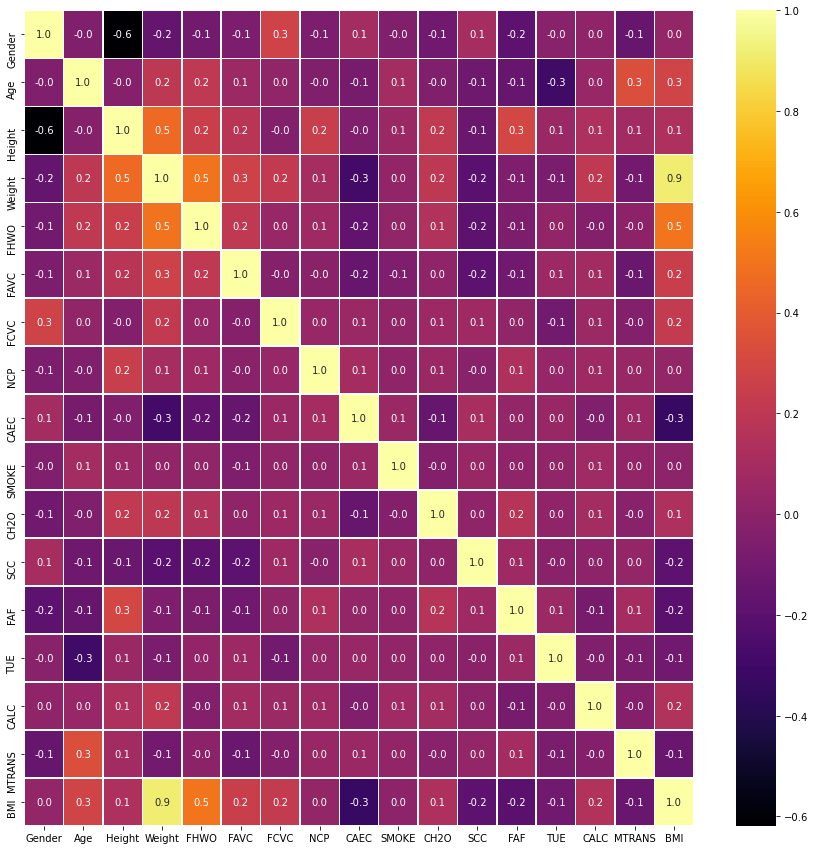

In [19]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="inferno", linewidths=.5, fmt= '.1f',ax=ax);

# Метод kNN

In [24]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [25]:
X, y = make_classification(n_features=20, n_redundant=0, n_informative=10,
                           random_state=1, n_clusters_per_class=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1, weights='distance').fit(X_train, y_train)
y_knn = knn.predict(X_test)
print('все предсказания', y_knn)
y_knn_filt = np.max(knn.predict_proba(X_test), axis=1) == 1
print('фильтр уверенных предсказаний', y_knn_filt)
print('только уверенные предсказания', np.array(y_knn)[y_knn_filt])
AA = accuracy_score(y_test, y_knn)
print('score по всем предсказаниям', AA)
AA_filt = accuracy_score(np.array(y_test)[y_knn_filt], np.array(y_knn)[y_knn_filt])
print('score по уверенным предсказаниям', AA_filt)


все предсказания [0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1
 1 0 1]
фильтр уверенных предсказаний [ True  True  True False False  True  True  True  True False  True  True
  True  True  True False  True  True  True  True  True  True False False
  True  True  True  True False False  True  True  True  True  True  True
  True  True  True  True]
только уверенные предсказания [0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1]
score по всем предсказаниям 0.925
score по уверенным предсказаниям 1.0


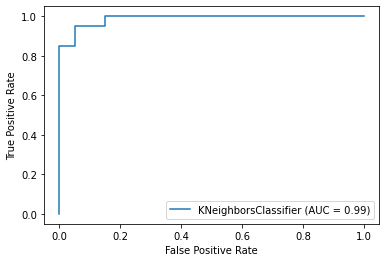

In [26]:
plot_roc_curve(knn, X_test, y_test)
plt.show()


In [27]:
#средние значения в зависимости от уровня ожирения
df_age_mean = df.groupby('BMI').mean()
df_age_mean

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
BMI,,,,,,,,,,,,,,,,
0,0.636029,19.783237,1.691117,49.906330,0.463235,0.812500,2.480788,2.914403,1.448529,0.003676,1.871281,0.080882,1.250131,0.839459,0.573529,0.235294
1,0.491289,21.738676,1.676585,62.155052,0.540070,0.724739,2.334495,2.738676,1.498258,0.045296,1.850174,0.104530,1.247387,0.675958,0.696864,0.588850
2,0.500000,23.417674,1.687836,74.266828,0.720690,0.924138,2.264631,2.504218,0.962069,0.010345,2.058725,0.127586,1.056796,0.612992,0.882759,0.355172
3,0.355172,26.996981,1.703748,82.085271,0.937931,0.744828,2.260578,2.495529,1.072414,0.017241,2.025133,0.013793,0.958072,0.697275,0.624138,0.393103
4,0.444444,25.884941,1.693804,92.870198,0.980057,0.968661,2.186050,2.431862,1.048433,0.017094,2.112218,0.005698,0.986748,0.676743,0.569801,0.347578
5,0.006734,28.233785,1.771795,115.305311,0.996633,0.976431,2.391284,2.744555,1.013468,0.050505,1.877658,0.003367,0.971857,0.515186,0.767677,0.343434
6,0.996914,23.495554,1.687559,120.941114,1.000000,0.996914,3.000000,3.000000,1.003086,0.003086,2.208493,0.000000,0.664817,0.604623,0.996914,0.003086


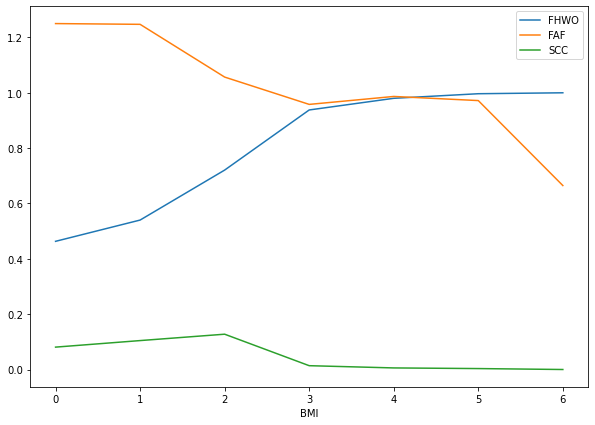

In [29]:
#график средней наследственности в зависимости от степени ожирения
df_age_mean['FHWO'].plot(legend=True)
#график средней физической активности в зависимости от степени ожирения
df_age_mean['FAF'].plot(legend=True)
#график контроля потребления калорий в зависимости от степени ожирения
df_age_mean['SCC'].plot(legend=True,figsize=(10,7))
plt.savefig(os.path.join(img_dir, 'Average BMI by FAF_SCC.png'))

# Линейная регрессия

Text(0, 0.5, 'Ожирение')

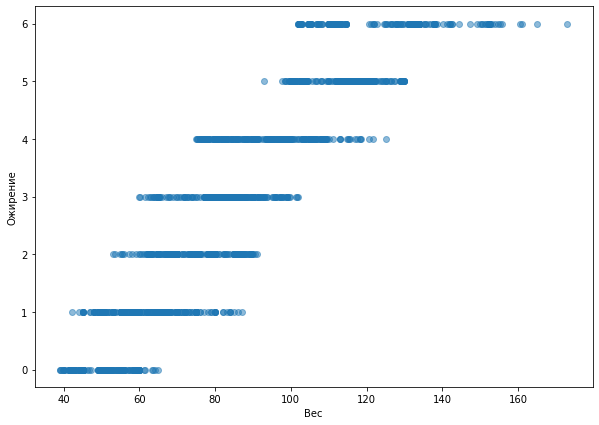

In [30]:
plt.figure(figsize=(10,7))
plt.scatter(df.Weight,df.BMI,alpha = 0.5)
plt.xlabel('Вес')
plt.ylabel('Ожирение')

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
X = pd.DataFrame(df.Weight)
Y = pd.DataFrame(df.BMI)

In [34]:
model.fit(X,Y)

LinearRegression()

In [35]:
#посмотрим коэффициент
model.coef_

array([[0.06921642]])

In [36]:
#и свободный коэффициент
model.intercept_

array([-2.88090828])

Text(0, 0.5, 'Ожирение')

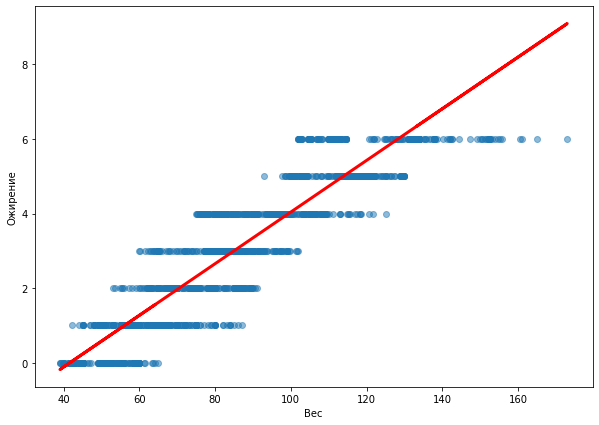

In [37]:
plt.figure(figsize=(10,7))
plt.scatter(df.Weight,df.BMI,alpha = 0.5)

plt.plot(X,model.predict(X), color = 'red',linewidth = 3)

plt.xlabel('Вес')
plt.ylabel('Ожирение')

In [38]:
#узнаем на сколько "правдивы" предсказания
model.score(X,Y)

0.8340270269255957

In [39]:
#попробуем предсказать нашу стадию ожирения при весе 80 кг
model.predict([[80]])

array([[2.65640567]])

# SVM

In [42]:
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [43]:
X = pd.DataFrame(df.Weight)
Y = pd.DataFrame(df.BMI)

In [44]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [47]:
clf.fit(X, Y.values.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [72]:
print(clf.predict([[80]]))

[3]


# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
X = pd.DataFrame(df.Weight)
Y = pd.DataFrame(df.BMI)

In [76]:
clf = LogisticRegression(random_state=0).fit(X, Y.values.ravel())

In [78]:
print(clf.predict([[80]]))

print(clf.score(X, Y))

[3]
0.4604452865940313


# Perceptron

In [79]:
from sklearn.linear_model import Perceptron

In [80]:
X = pd.DataFrame(df.Weight)
Y = pd.DataFrame(df.BMI)

In [81]:
clf = Perceptron(tol=1e-3, random_state=0)

In [82]:
clf.fit(X, Y.values.ravel())

Perceptron()

In [83]:
clf.score(X, Y)

0.18000947418285174